### 1、对商户数据进行探究，可视化查看商户分布&将它的信息整合到测试、训练、历史还款数据中

总共有 5599 家商户
industry_level1 中各类的商户数量:
1    3029
2    1987
3     583
Name: industry_level1, dtype: int64

province 中各类的商户数量:
1    3742
2    1066
3     791
Name: province, dtype: int64


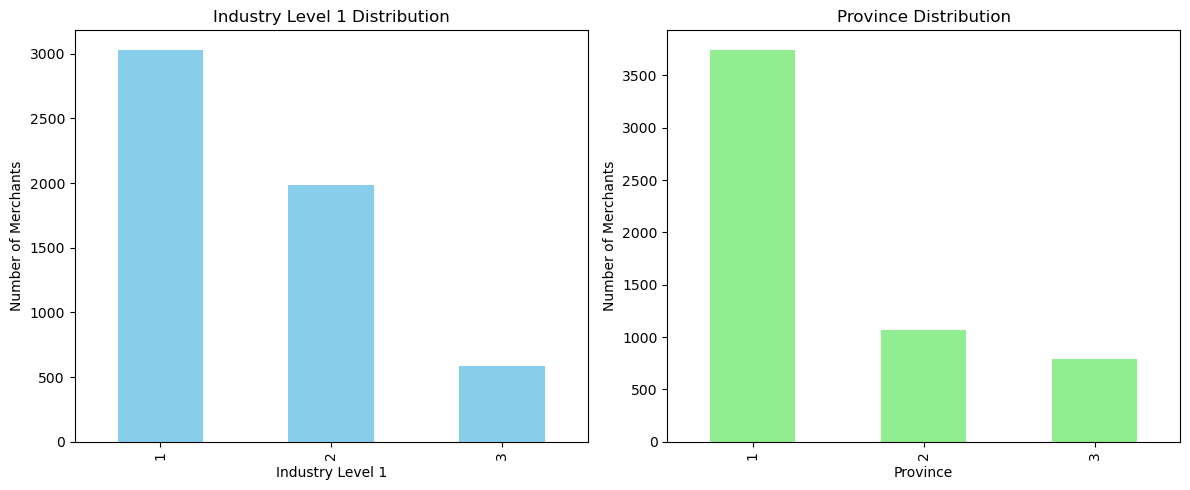

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = '商户数据/table_datamining_merchant.txt'
df = pd.read_csv(file_path)

total_merchants = df.shape[0]
print(f"总共有 {total_merchants} 家商户")

# 统计 industry_level1 中各类的商户数量
industry_counts = df['industry_level1'].value_counts()
print("industry_level1 中各类的商户数量:")
print(industry_counts)

# 统计 province 中各类的商户数量
province_counts = df['province'].value_counts()
print("\nprovince 中各类的商户数量:")
print(province_counts)

# 可视化 industry_level1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Industry Level 1 Distribution')
plt.xlabel('Industry Level 1')
plt.ylabel('Number of Merchants')

# 可视化 province
plt.subplot(1, 2, 2)
province_counts.plot(kind='bar', color='lightgreen')
plt.title('Province Distribution')
plt.xlabel('Province')
plt.ylabel('Number of Merchants')

plt.tight_layout()
plt.show()


In [1]:

import pandas as pd

# 读取数据
test_df1 = pd.read_csv('测试1/table_loan_test.txt')
test_df2 = pd.read_csv('训练1/table_loan_train.txt')
test_df3 = pd.read_csv('历史还款数据/table_datamining_history_loan.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 提取 merchant_id 并转换为集合
test_ids1 = set(test_df1['merchant_id'])
test_ids2 = set(test_df2['merchant_id'])
test_ids3 = set(test_df3['merchant_id'])
merchant_ids = set(merchant_df['merchant_id'])

# 检查 test 中的所有 merchant_id 是否在 merchant 中
all_found1 = test_ids1.issubset(merchant_ids)
all_found2 = test_ids2.issubset(merchant_ids)
all_found3 = test_ids3.issubset(merchant_ids)

# 打印结果
print(f"所有在 table_loan_test.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: {all_found1}")
print(f"所有在 table_loan_train.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: {all_found2}")
print(f"所有在 table_datamining_history_loan.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: {all_found3}")
# 如果有不在的 merchant_id，打印它们
if not all_found1:
    missing_ids1 = test_ids1 - merchant_ids
    print(f"table_loan_test.txt中以下 merchant_id 在 table_datamining_merchant.txt 中找不到，共 {len(missing_ids1)} 个:")
    for mid in missing_ids1:
        print(mid)


if not all_found2:
    missing_ids2 = test_ids2 - merchant_ids
    print(f"table_loan_train.txt中以下 merchant_id 在 table_datamining_merchant.txt 中找不到，共 {len(missing_ids2)} 个:")
    for mid in missing_ids2:
        print(mid)


if not all_found3:
    missing_ids3 = test_ids3 - merchant_ids
    print(f"table_datamining_history_loan.txt中以下 merchant_id 在 table_datamining_merchant.txt 中找不到，共 {len(missing_ids3)} 个:")
    for mid in missing_ids3:
        print(mid)

所有在 table_loan_test.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: True
所有在 table_loan_train.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: True
所有在 table_datamining_history_loan.txt 中的 merchant_id 都可以在 table_datamining_merchant.txt 中找到: True


### 2、历史还款数据合并

In [2]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('历史还款数据/table_datamining_history_loan.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("历史还款数据合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))

# 合并数据
# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')


# 显示合并后的数据大小和前三行
print("历史还款数据\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))


# 保存更新后的 DataFrame
updated_history_df.to_csv('历史还款数据/table_datamining_history_loan_with_merchant_info.txt', index=False)


历史还款数据合并前的数据大小（行，列）: (353, 8)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0   9664605   41973696425690  2017-03-08 00:00:00      20000.0            6   
1  20869326  175783930702994  2017-07-16 00:00:00      15000.0            4   
2  12498066  175783930702994  2017-04-18 00:00:00      15000.0           12   

  notional_settle_date     real_settle_date  is_30days_overdue  
0  2017-09-10 00:00:00  2017-05-12 00:00:00                  0  
1  2017-11-19 00:00:00  2017-10-30 00:00:00                  0  
2  2018-04-19 00:00:00  2017-05-03 00:00:00                  0  
历史还款数据
合并后的数据大小（行，列）: (353, 10)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0   9664605   41973696425690  2017-03-08 00:00:00      20000.0            6   
1  20869326  175783930702994  2017-07-16 00:00:00      15000.0            4   
2  12498066  175783930702994  2017-04-18 00:00:00      15000.0           12   

  notional_settle_date

### 3、测试数据合并

In [11]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('测试1/test_merchant_in_both_datasets.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("both合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("both\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('测试1/test_both_with_merchant_info.txt', index=False)


both合并前的数据大小（行，列）: (65, 5)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period
0  51179153  741067405523374  2018-05-23 00:00:00      50000.0            4
1  51727931   72468430993589  2018-05-28 00:00:00       5000.0            6
2  49518154  120072423392034  2018-05-02 00:00:00      50000.0           12
both
合并后的数据大小（行，列）: (65, 7)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  51179153  741067405523374  2018-05-23 00:00:00      50000.0            4   
1  51727931   72468430993589  2018-05-28 00:00:00       5000.0            6   
2  49518154  120072423392034  2018-05-02 00:00:00      50000.0           12   

   industry_level1  province  
0                2         1  
1                2         1  
2                1         1  


In [12]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('测试1/test_merchant_in_neither_dataset.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("neither合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("neither\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('测试1/test_neither_with_merchant_info.txt', index=False)


neither合并前的数据大小（行，列）: (40, 5)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period
0  49715004  205506711754915  2018-05-03 00:00:00       6000.0            6
1  50606108  658349445747974  2018-05-15 00:00:00       3000.0            6
2  49875190  117559521151151  2018-05-06 00:00:00       5000.0           12
neither
合并后的数据大小（行，列）: (40, 7)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  49715004  205506711754915  2018-05-03 00:00:00       6000.0            6   
1  50606108  658349445747974  2018-05-15 00:00:00       3000.0            6   
2  49875190  117559521151151  2018-05-06 00:00:00       5000.0           12   

   industry_level1  province  
0                1         1  
1                3         1  
2                1         2  


In [13]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('测试1/test_merchant_only_in_combined.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("combined合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("combined\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('测试1/test_combined_with_merchant_info.txt', index=False)


combined合并前的数据大小（行，列）: (400, 5)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period
0  50557025   40407382055696  2018-05-14 00:00:00       3000.0           12
1  49510913  233357058121933  2018-05-01 00:00:00      10000.0            6
2  50782824  295347911545545  2018-05-19 00:00:00       5000.0            3
combined
合并后的数据大小（行，列）: (400, 7)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  50557025   40407382055696  2018-05-14 00:00:00       3000.0           12   
1  49510913  233357058121933  2018-05-01 00:00:00      10000.0            6   
2  50782824  295347911545545  2018-05-19 00:00:00       5000.0            3   

   industry_level1  province  
0                1         2  
1                2         1  
2                2         1  


In [14]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('测试1/test_merchant_only_in_history.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("history合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("history\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('测试1/test_history_with_merchant_info.txt', index=False)


history合并前的数据大小（行，列）: (10, 5)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period
0  52850085  938726117359139  2018-06-09 00:00:00       8000.0            3
1  50782497  997267937584480  2018-05-18 00:00:00      15000.0            6
2  53144185  234314243820569  2018-06-12 00:00:00      24000.0            3
history
合并后的数据大小（行，列）: (10, 7)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  52850085  938726117359139  2018-06-09 00:00:00       8000.0            3   
1  50782497  997267937584480  2018-05-18 00:00:00      15000.0            6   
2  53144185  234314243820569  2018-06-12 00:00:00      24000.0            3   

   industry_level1  province  
0                2         1  
1                1         1  
2                1         1  


### 4、训练数据合并

In [15]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('训练1/merchant_in_both_datasets.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("both合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("both\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('训练1/train_both_with_merchant_info.txt', index=False)


both合并前的数据大小（行，列）: (164, 6)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  52849963  934378057859389  2018-06-08 00:00:00      50000.0            3   
1  51968426  671059822241463  2018-06-01 00:00:00       5000.0           12   
2  50007193  581824784033132  2018-05-08 00:00:00      45000.0            4   

   is_30days_overdue  
0                  0  
1                  1  
2                  0  
both
合并后的数据大小（行，列）: (164, 8)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  52849963  934378057859389  2018-06-08 00:00:00      50000.0            3   
1  51968426  671059822241463  2018-06-01 00:00:00       5000.0           12   
2  50007193  581824784033132  2018-05-08 00:00:00      45000.0            4   

   is_30days_overdue  industry_level1  province  
0                  0                1         2  
1                  1                1         2  
2                  0                1        

In [16]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('训练1/merchant_in_neither_dataset.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("neither合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("neither\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('训练1/train_neither_with_merchant_info.txt', index=False)


neither合并前的数据大小（行，列）: (93, 6)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  50228902  506276735863005  2018-05-09 00:00:00       3000.0            9   
1  49717184  418091595015970  2018-05-04 00:00:00       5000.0           12   
2  50606082   87897144297615  2018-05-15 00:00:00       5000.0           12   

   is_30days_overdue  
0                  0  
1                  0  
2                  0  
neither
合并后的数据大小（行，列）: (93, 8)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  50228902  506276735863005  2018-05-09 00:00:00       3000.0            9   
1  49717184  418091595015970  2018-05-04 00:00:00       5000.0           12   
2  50606082   87897144297615  2018-05-15 00:00:00       5000.0           12   

   is_30days_overdue  industry_level1  province  
0                  0                1         1  
1                  0                2         1  
2                  0                1    

In [17]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('训练1/merchant_only_in_combined.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("combined合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("combined\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('训练1/train_combined_with_merchant_info.txt', index=False)


combined合并前的数据大小（行，列）: (910, 6)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53143959  408215340609460  2018-06-11 00:00:00      50000.0           12   
1  52485335  869864018479063  2018-06-06 00:00:00      50000.0           12   
2  53143906  126255549518741  2018-06-11 00:00:00      20000.0            6   

   is_30days_overdue  
0                  0  
1                  0  
2                  1  
combined
合并后的数据大小（行，列）: (910, 8)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53143959  408215340609460  2018-06-11 00:00:00      50000.0           12   
1  52485335  869864018479063  2018-06-06 00:00:00      50000.0           12   
2  53143906  126255549518741  2018-06-11 00:00:00      20000.0            6   

   is_30days_overdue  industry_level1  province  
0                  0                1         1  
1                  0                1         1  
2                  1                1

In [18]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('训练1/merchant_only_in_history.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("history合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("history\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('训练1/train_history_with_merchant_info.txt', index=False)


history合并前的数据大小（行，列）: (33, 6)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53144986   35682383773194  2018-06-11 00:00:00       5000.0            3   
1  49877228  339900431712051  2018-05-06 00:00:00       8000.0           12   
2  51909061  916659045226757  2018-05-31 00:00:00      30000.0            9   

   is_30days_overdue  
0                  0  
1                  0  
2                  1  
history
合并后的数据大小（行，列）: (33, 8)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53144986   35682383773194  2018-06-11 00:00:00       5000.0            3   
1  49877228  339900431712051  2018-05-06 00:00:00       8000.0           12   
2  51909061  916659045226757  2018-05-31 00:00:00      30000.0            9   

   is_30days_overdue  industry_level1  province  
0                  0                2         1  
1                  0                1         1  
2                  1                2    

In [19]:
import pandas as pd

# 读取数据
history_df = pd.read_csv('训练1/table_loan_train.txt')
merchant_df = pd.read_csv('商户数据/table_datamining_merchant.txt')

# 显示合并前的数据大小和前三行
print("history合并前的数据大小（行，列）:", history_df.shape)
print("合并前数据的前三行:")
print(history_df.head(3))



# 使用左合并（left join），这样历史还款数据的所有行都会被保留
updated_history_df = pd.merge(history_df, merchant_df[['merchant_id', 'industry_level1', 'province']], 
                              on='merchant_id', how='left')

# 显示合并后的数据大小和前三行
print("history\n合并后的数据大小（行，列）:", updated_history_df.shape)
print("合并后数据的前三行:")
print(updated_history_df.head(3))

# 保存更新后的 DataFrame
updated_history_df.to_csv('训练1/table_loan_with_merchant_info.txt', index=False)


history合并前的数据大小（行，列）: (1200, 6)
合并前数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53143959  408215340609460  2018-06-11 00:00:00      50000.0           12   
1  52485335  869864018479063  2018-06-06 00:00:00      50000.0           12   
2  53143906  126255549518741  2018-06-11 00:00:00      20000.0            6   

   is_30days_overdue  
0                  0  
1                  0  
2                  1  
history
合并后的数据大小（行，列）: (1200, 8)
合并后数据的前三行:
   apply_id      merchant_id           apply_date  lend_amount  lend_period  \
0  53143959  408215340609460  2018-06-11 00:00:00      50000.0           12   
1  52485335  869864018479063  2018-06-06 00:00:00      50000.0           12   
2  53143906  126255549518741  2018-06-11 00:00:00      20000.0            6   

   is_30days_overdue  industry_level1  province  
0                  0                1         1  
1                  0                1         1  
2                  1                1

: 